UDG - CUCEA - MCD - Desarrollo de Proyecto I  
Alumno: Fernando Arevalo

# Análisis exploratorio de datos (EDA)

### Primero Seleccionaremos las Acciones
Para este análisis exploratorio elegiremos 5 de las acciones más capitalizadas:

1. Apple Inc. (AAPL)
2. Microsoft Corporation (MSFT)
3. Amazon.com, Inc. (AMZN)
4. Alphabet Inc. (GOOGL)
5. Meta Platforms, Inc. (META) (anteriormente Facebook)

### Segundo descargaremos los datos,y los guardaremos correctamente estructurados

#### Paso 1: Descargar los Datos con yfinance

In [1]:
import yfinance as yf
import pandas as pd

# Lista de símbolos
symbols = ['AAPL', 'MSFT', 'AMZN', 'GOOGL', 'META']

# Descargar datos
data = yf.download(symbols, start='2020-01-01', end='2021-12-31')

# Verificar los datos descargados
print(data.head())


[*********************100%%**********************]  5 of 5 completed

Price       Adj Close                                                \
Ticker           AAPL       AMZN      GOOGL        META        MSFT   
Date                                                                  
2020-01-02  72.876106  94.900497  68.264961  209.150269  153.938202   
2020-01-03  72.167625  93.748497  67.907852  208.043610  152.021393   
2020-01-06  72.742661  95.143997  69.717865  211.961807  152.414352   
2020-01-07  72.400543  95.343002  69.583206  212.420410  151.024704   
2020-01-08  73.565216  94.598503  70.078476  214.573944  153.430252   

Price           Close                                                ...  \
Ticker           AAPL       AMZN      GOOGL        META        MSFT  ...   
Date                                                                 ...   
2020-01-02  75.087502  94.900497  68.433998  209.779999  160.619995  ...   
2020-01-03  74.357498  93.748497  68.075996  208.669998  158.619995  ...   
2020-01-06  74.949997  95.143997  69.890503  212.60

#### Paso 2: Aplanar el Índice de las Columnas

In [8]:
data.columns = ['_'.join(col).strip() for col in data.columns.values]

#### Paso 3: Asignar nombre al índice y resetearlo

In [9]:
data.index.name = 'Date'  # Asigna el nombre 'Date' al índice
data = data.reset_index()

#### Paso 4: Reestructurar con melt

In [12]:
data_melted = pd.melt(data, id_vars=['Date'], var_name='Variable', value_name='Value')

In [16]:
# Paso 5: Filtrar las filas donde 'Variable' contiene '_'
data_filtered = data_melted[data_melted['Variable'].str.contains('_')]

In [17]:
# Paso 6: Separar 'Variable' en 'Attribute' y 'Ticker'
data_filtered[['Attribute', 'Ticker']] = data_filtered['Variable'].str.split('_', expand=True)

In [18]:
# Paso 7: Eliminar la columna 'Variable' y reordenar
data_filtered = data_filtered.drop('Variable', axis=1)
data_filtered = data_filtered[['Date', 'Ticker', 'Attribute', 'Value']]

In [19]:
# Paso 8: Verificar el resultado
print(data_filtered.head())

        Date Ticker  Attribute      Value
0 2020-01-02   AAPL  Adj Close  72.876106
1 2020-01-03   AAPL  Adj Close  72.167625
2 2020-01-06   AAPL  Adj Close  72.742661
3 2020-01-07   AAPL  Adj Close  72.400543
4 2020-01-08   AAPL  Adj Close  73.565216


In [20]:
# Paso 9: Guardar en CSV
data_filtered.to_csv('datos_acciones.csv', index=False)

### Tercer paso, Ahora que tenemos los datos correctamente estructurados y guardados, continuaremos con el Análisis Exploratorio de Datos (EDA)  
1. Descripción de los datos
2. Limpieza de datos
3. Valores faltantes (Missing values)
4. Visualización de datos
5. Referencias

### 1. Descripción de los Datos

##### Importar Librerías y Cargar los Datos  
Primero, debemos importar las librerías necesarias y cargar el archivo CSV que hemos generado.

In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Configurar opciones de visualización
%matplotlib inline
sns.set(style="whitegrid")

# Cargar los datos desde el archivo CSV
data = pd.read_csv('datos_acciones.csv')

# Ver las primeras filas del DataFrame
print(data.head())

         Date Ticker  Attribute      Value
0  2020-01-02   AAPL  Adj Close  72.876106
1  2020-01-03   AAPL  Adj Close  72.167625
2  2020-01-06   AAPL  Adj Close  72.742661
3  2020-01-07   AAPL  Adj Close  72.400543
4  2020-01-08   AAPL  Adj Close  73.565216


##### Información General del DataFrame
Obtenemos información general sobre el DataFrame para entender su estructura.

In [22]:
# Dimensiones del DataFrame
print(f"El DataFrame tiene {data.shape[0]} filas y {data.shape[1]} columnas.")

# Información de las columnas
print(data.info())

El DataFrame tiene 15120 filas y 4 columnas.
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15120 entries, 0 to 15119
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       15120 non-null  object 
 1   Ticker     15120 non-null  object 
 2   Attribute  15120 non-null  object 
 3   Value      15120 non-null  float64
dtypes: float64(1), object(3)
memory usage: 472.6+ KB
None


##### Estadísticas Descriptivas
Calculamos estadísticas básicas para comprender mejor los datos numéricos.

In [23]:
# Convertir la columna 'Date' a tipo datetime
data['Date'] = pd.to_datetime(data['Date'])

# Estadísticas descriptivas para la columna 'Value'
print(data['Value'].describe())

count    1.512000e+04
mean     9.845173e+06
std      3.054514e+07
min      5.044350e+01
25%      1.248288e+02
50%      1.722370e+02
75%      3.002346e+02
max      4.265100e+08
Name: Value, dtype: float64


##### Variables Únicas en 'Ticker' y 'Attribute'
Identificamos las diferentes acciones y atributos presentes en el conjunto de datos.

In [24]:
# Acciones (Tickers) disponibles
tickers = data['Ticker'].unique()
print(f"Acciones disponibles: {tickers}")

# Atributos disponibles
attributes = data['Attribute'].unique()
print(f"Atributos disponibles: {attributes}")

Acciones disponibles: ['AAPL' 'AMZN' 'GOOGL' 'META' 'MSFT']
Atributos disponibles: ['Adj Close' 'Close' 'High' 'Low' 'Open' 'Volume']


### 2. Limpieza de Datos

##### Verificar Tipos de Datos
Aseguramos que las columnas tengan los tipos de datos correctos.

In [25]:
# Ver tipos de datos
print(data.dtypes)

Date         datetime64[ns]
Ticker               object
Attribute            object
Value               float64
dtype: object


##### Eliminar Duplicados
Verificamos si hay filas duplicadas y las eliminamos.

In [28]:
# Número de duplicados
num_duplicates = data.duplicated().sum()
print(f"Número de filas duplicadas: {num_duplicates}")

# Eliminar duplicados si existen
if num_duplicates > 0:
    data = data.drop_duplicates()

Número de filas duplicadas: 0


### 3. Valores Faltantes (Missing Values)

##### Detección de Valores Faltantes
Comprobamos si hay valores faltantes en el DataFrame.

In [29]:
# Conteo de valores faltantes por columna
missing_values = data.isnull().sum()
print("Valores faltantes por columna:")
print(missing_values)

Valores faltantes por columna:
Date         0
Ticker       0
Attribute    0
Value        0
dtype: int64


##### Análisis de Valores Faltantes
- Si hubiera valores faltantes en 'Value': Esto puede afectar nuestros análisis, por lo que necesitariamos decidir cómo manejarlos.
- Opciones:
  - Eliminar las filas con valores faltantes.
  - Imputar valores faltantes: Por ejemplo, utilizando el promedio o mediana.

En nuestro caso no tuvimos valores faltantes, así que continuamos con nuestro análisis

### 4. Visualización de Datos

##### Preparación para Visualizaciones
Para facilitar las visualizaciones, pivotaremos el DataFrame para tener las columnas de atributos.

In [30]:
# Pivotar el DataFrame
data_pivot = data.pivot_table(index=['Date', 'Ticker'], columns='Attribute', values='Value').reset_index()

# Ver las primeras filas
print(data_pivot.head())

Attribute       Date Ticker   Adj Close       Close        High         Low  \
0         2020-01-02   AAPL   72.876106   75.087502   75.150002   73.797501   
1         2020-01-02   AMZN   94.900497   94.900497   94.900497   93.207497   
2         2020-01-02  GOOGL   68.264961   68.433998   68.433998   67.324501   
3         2020-01-02   META  209.150269  209.779999  209.789993  206.270004   
4         2020-01-02   MSFT  153.938202  160.619995  160.729996  158.330002   

Attribute        Open       Volume  
0           74.059998  135480400.0  
1           93.750000   80580000.0  
2           67.420502   27278000.0  
3          206.750000   12077100.0  
4          158.779999   22622100.0  


##### Visualización del Precio de Cierre Ajustado ('Adj Close') para Cada Acción

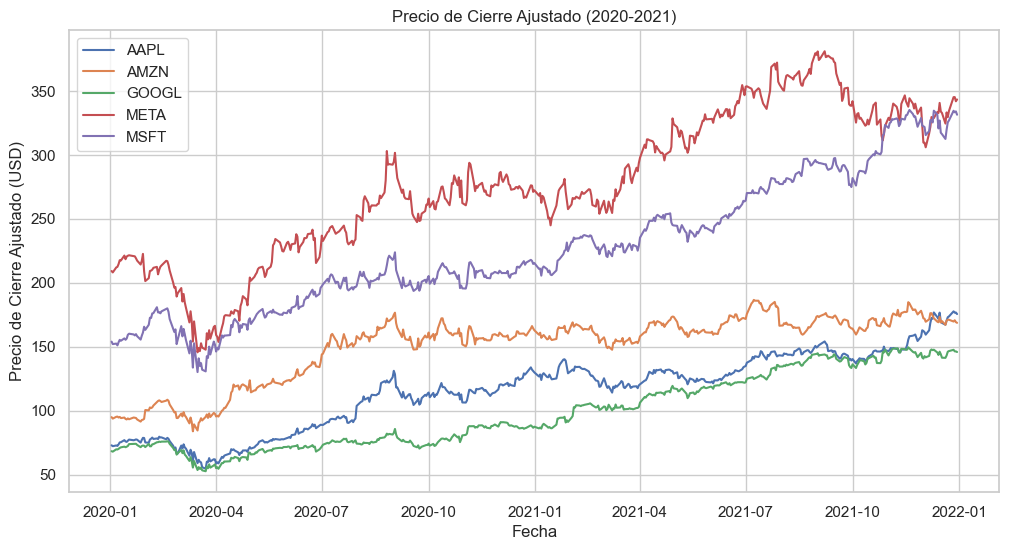

In [31]:
plt.figure(figsize=(12,6))

for ticker in tickers:
    subset = data_pivot[data_pivot['Ticker'] == ticker]
    plt.plot(subset['Date'], subset['Adj Close'], label=ticker)

plt.title('Precio de Cierre Ajustado (2020-2021)')
plt.xlabel('Fecha')
plt.ylabel('Precio de Cierre Ajustado (USD)')
plt.legend()
plt.show()

##### Análisis de Volumen de Negociación

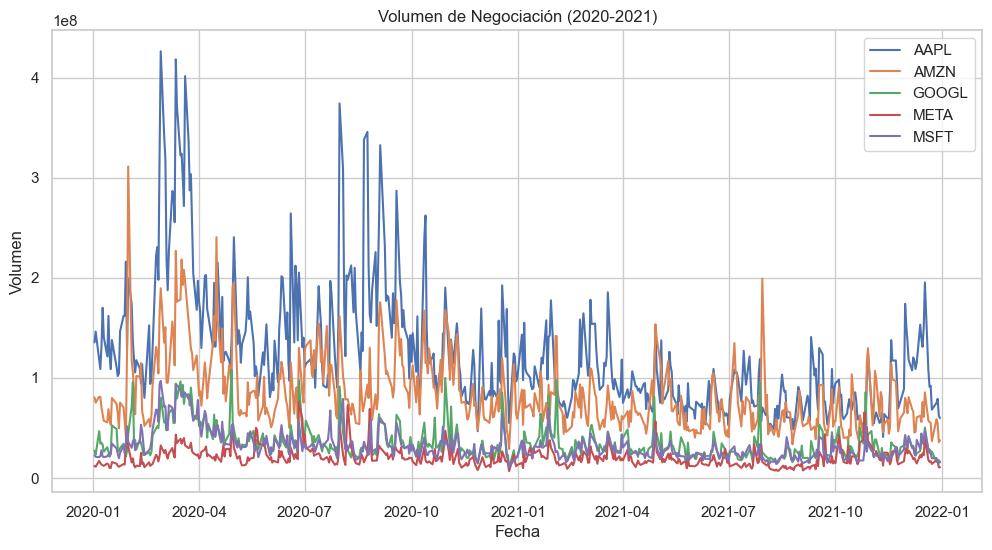

In [32]:
plt.figure(figsize=(12,6))

for ticker in tickers:
    subset = data_pivot[data_pivot['Ticker'] == ticker]
    plt.plot(subset['Date'], subset['Volume'], label=ticker)

plt.title('Volumen de Negociación (2020-2021)')
plt.xlabel('Fecha')
plt.ylabel('Volumen')
plt.legend()
plt.show()

##### Retornos Diarios
Calculamos y visualizamos los retornos diarios.

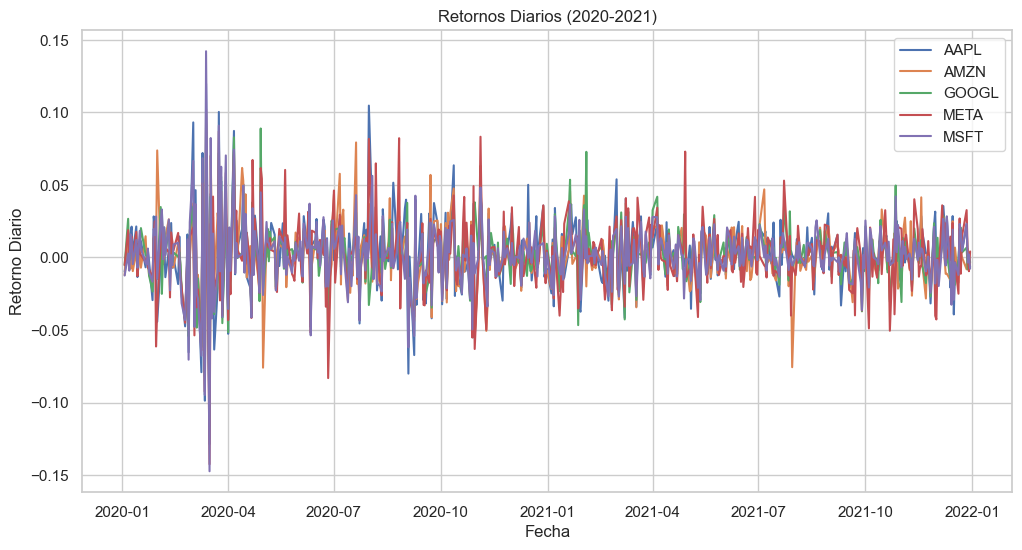

In [34]:
plt.figure(figsize=(12,6))

for ticker in tickers:
    subset = data_pivot[data_pivot['Ticker'] == ticker].sort_values('Date')
    subset['Daily Return'] = subset['Adj Close'].pct_change()
    plt.plot(subset['Date'], subset['Daily Return'], label=ticker)

plt.title('Retornos Diarios (2020-2021)')
plt.xlabel('Fecha')
plt.ylabel('Retorno Diario')
plt.legend()
plt.show()

#### Análisis de Correlación entre Acciones

##### Crear una Tabla Pivote con Precios de Cierre Ajustado

In [35]:
# Crear una tabla pivote
pivot_table = data_pivot.pivot(index='Date', columns='Ticker', values='Adj Close')

# Calcular la matriz de correlación
returns = pivot_table.pct_change()
correlation = returns.corr()

# Mostrar la matriz de correlación
print("Matriz de correlación:")
print(correlation)

Matriz de correlación:
Ticker      AAPL      AMZN     GOOGL      META      MSFT
Ticker                                                  
AAPL    1.000000  0.670216  0.698124  0.697754  0.805957
AMZN    0.670216  1.000000  0.647919  0.632579  0.695673
GOOGL   0.698124  0.647919  1.000000  0.734923  0.820704
META    0.697754  0.632579  0.734923  1.000000  0.698811
MSFT    0.805957  0.695673  0.820704  0.698811  1.000000


##### Visualizar la Matriz de Correlación

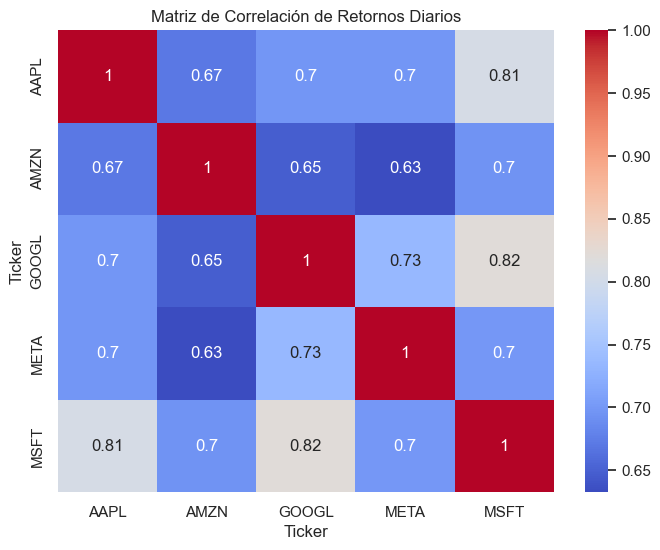

In [37]:
plt.figure(figsize=(8,6))
sns.heatmap(correlation, annot=True, cmap='coolwarm')
plt.title('Matriz de Correlación de Retornos Diarios')
plt.show()

##### Análisis de Correlación:
  
* Las acciones analizadas presentan altas correlaciones entre sí, lo que es común en empresas del mismo sector o en mercados alcistas generales.
* Esto sugiere que factores macroeconómicos y sentimentales podrían estar afectando a estas acciones de manera similar.

### Notas finales:  
Este EDA nos brinda una comprensión inicial de los datos históricos de las acciones más capitalizadas. Nos prepara para etapas posteriores del proyecto donde integraremos análisis más complejos para mejorar la toma de decisiones de inversión.

### Siguientes Pasos
* Análisis de Eventos Específicos:
  * Investigar fechas con movimientos significativos para entender las causas detrás de ellos.
* Incorporar Análisis de Sentimientos:
  * En futuros análisis, combinar los datos históricos con el análisis de sentimientos podría aportar mayor profundidad.
* Modelado Predictivo:
  * Utilizar los datos procesados para desarrollar modelos que puedan predecir movimientos futuros.

### 5. Referencias

* Librerías Utilizadas:

  * Pandas: https://pandas.pydata.org/
  * NumPy: https://numpy.org/
  * Matplotlib: https://matplotlib.org/
  * Seaborn: https://seaborn.pydata.org/
  * yfinance: https://pypi.org/project/yfinance/
* Fuentes de Datos:
  * Yahoo Finance a través de la librería yfinance.
* Documentación y Recursos Adicionales:
  * Análisis Exploratorio de Datos: https://www.kaggle.com/learn/data-cleaning
  * Visualización de Datos con Matplotlib y Seaborn: https://realpython.com/python-matplotlib-guide/
  * Análisis exploratorio de datos (EDA): https://github.com/vcuspinera/UDG_MCD_Project_Dev_I/blob/main/actividades/13_EDA.ipynb